In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

# Bijectors and normalising flows

 ## Coding tutorials
 #### [1. Bijectors](#coding_tutorial_1)
 #### [2. The TransformedDistribution class](#coding_tutorial_2)
 #### [3. Subclassing bijectors](#coding_tutorial_3)
 #### [4. Normalising flows](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Bijectors

In [1]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

normal_distrib = tfp.distributions.Normal(loc=0., scale=1.)
z = normal_distrib.sample(sample_shape=(3,))

scale_and_shift = tfp.bijectors.Chain(bijectors=[
    tfp.bijectors.Shift(shift=1.),
    tfp.bijectors.Scale(scale=2.)
])

x = scale_and_shift.forward(x=z)
print('x:', x)
z = scale_and_shift.inverse(y=x)
print('z:', z)

log_prob_x = normal_distrib.log_prob(value=z)\
    - scale_and_shift.forward_log_det_jacobian(x=z, event_ndims=0)
print('log_prob x:', log_prob_x)

x: tf.Tensor([ 1.1344042 -2.3139892 -1.3672998], shape=(3,), dtype=float32)
z: tf.Tensor([ 0.06720211 -1.6569946  -1.1836499 ], shape=(3,), dtype=float32)
log_prob x: tf.Tensor([-1.6143438 -2.9849012 -2.3125992], shape=(3,), dtype=float32)


In [1]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# Define base distribution

normal = tfp.distributions.Normal(loc=0., scale=1.)

In [2]:
# Sample from base distribution

n = 10000
z = normal.sample(sample_shape=(n,))

### Scale and shift bijector

In [3]:
# Define scale and shift

scale = 4.5
shift = 7

In [4]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# Define chain bijector

scale_and_shift = tfp.bijectors.Chain(bijectors=[
    tfp.bijectors.Shift(shift=shift),
    tfp.bijectors.Scale(scale=scale)
])

In [5]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# We can also use call methods

scale_transf = tfp.bijectors.Scale(scale=scale)
shift_transf = tfp.bijectors.Shift(shift=shift)
scale_and_shift = shift_transf(scale_transf)

In [5]:
# Apply the forward transformation

x = scale_and_shift.forward(x=z)

In [6]:
import tensorflow as tf
tf.random.set_seed(seed=42)

# Check the forward transformation

tf.norm(tensor=x-(scale*z+shift))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Plots

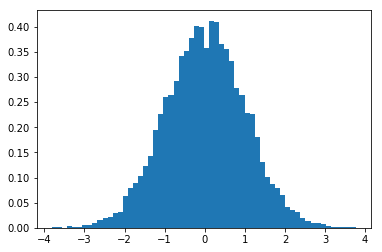

In [8]:
import matplotlib.pyplot as plt

# Plot z density

fig = plt.figure()
plt.hist(x=z, bins=60, density=True)
fig.show()

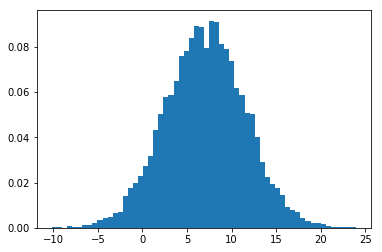

In [9]:
import matplotlib.pyplot as plt

# Plot x density

fig = plt.figure()
plt.hist(x=x, bins=60, density=True)
fig.show()

#### Inverse transformation

In [10]:
# Apply inverse transformation

inv_x = scale_and_shift.inverse(y=x)

In [11]:
import tensorflow as tf
tf.random.set_seed(seed=42)

# Check inverse transformation

tf.norm(tensor=inv_x-z)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Log probability

In [12]:
# Compute log prob for x

log_prob_x = normal.log_prob(value=z)\
    - scale_and_shift.forward_log_det_jacobian(x=z, event_ndims=0)
print(log_prob_x)

tf.Tensor([-2.4766338 -2.7780252 -2.4740348 ... -2.448865  -4.363263  -5.6196175], shape=(10000,), dtype=float32)


In [13]:
# We can also use the inverse transformation

log_prob_x = normal.log_prob(value=scale_and_shift.inverse(y=x))\
    + scale_and_shift.inverse_log_det_jacobian(y=x, event_ndims=0)
print(log_prob_x)

tf.Tensor([-2.4766338 -2.7780252 -2.4740348 ... -2.448865  -4.363263  -5.6196175], shape=(10000,), dtype=float32)


### Broadcasting

In [14]:
import tensorflow as tf
tf.random.set_seed(seed=42)

x = tf.random.normal(shape=(100, 1))

In [15]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# Softfloor bijector

softfloor = tfp.bijectors.Softfloor(temperature=0.01)
y = softfloor.forward(x=x)
print(y.shape)

(100, 1)


In [16]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# Softfloor bijector using broadcasting

softfloor = tfp.bijectors.Softfloor(temperature=[0.2, 1.])
y = softfloor.forward(x=x)
print(y.shape)

(100, 2)


In [17]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# Softfloor bijector using broadcasting

softfloor = tfp.bijectors.Softfloor(temperature=[0.01, 0.1, 1.])

In [20]:
import matplotlib.pyplot as plt

# Plot routine

def _plot(nparams, bijector, params, x):
    bijector_params = tuple(getattr(bijector, name)
        for name in params)
    upper_params = [name[0].upper() + name[1:] for name in params]
    plt.figure(figsize=(14, 5))
    lines = plt.plot(np.tile(A=x, reps=nparams),
        bijector.forward(x=x))
    for l in zip(lines, *bijector_params):
        labels = ': {:.2f}, '.join(upper_params) + ': {:.2f}'
        l[0].set_label(labels.format(*l[1:]))
    plt.legend()
    plt.show()

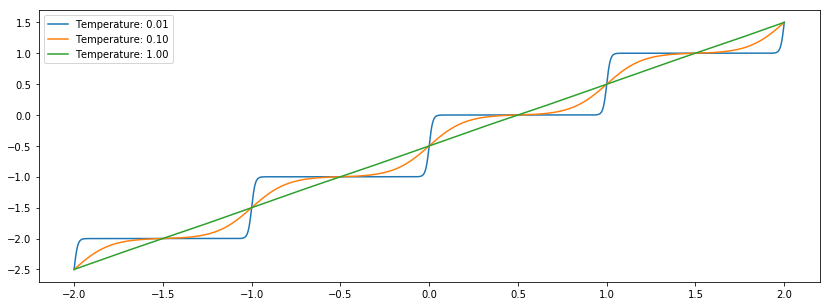

In [21]:
import numpy as np

# Plot

x = np.linspace(start=-2, stop=2, num=2000)[..., np.newaxis]
_plot(nparams=3, bijector=softfloor, params=['temperature'], x=x)

In [22]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# Gumbel bijector using broadcasting

exps = tfp.bijectors.GumbelCDF(loc=[0.5, 1, 1.5, 2, 3],
    scale=[1, 2, 2, 3, 4])

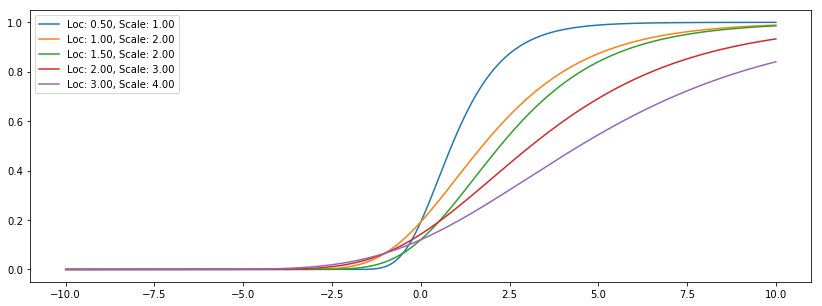

In [23]:
import numpy as np

# Plot

x = np.linspace(start=-10, stop=10, num=2000,
    dtype=np.float32)[..., np.newaxis]
_plot(nparams=5, bijector=exps, params=['loc', 'scale'], x=x)

***
<a id="coding_tutorial_2"></a>
## The TransformedDistribution class

### TransformedDistribution

In [1]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# Base dist.        Transformation        Data dist.
# Z ~ P0      <=>      x = f(z)     <=>    x ~ P1

# log_prob_x = base_dist.log_prob(bijector.inverse(y=x))
#     + bijector.inverse_log_det_jacobian(y=x, event_ndims=0)
# x_sample = bijector.forward(x=base_dist.sample())

normal_distrib = tfp.distributions.Normal(loc=0., scale=1.)
z = normal_distrib.sample(sample_shape=(3,))

bijector = tfp.bijectors.Chain(bijectors=[
    tfp.bijectors.Shift(shift=1.),
    tfp.bijectors.Exp()
])
x = bijector.forward(x=z)

log_prob_x = normal_distrib.log_prob(value=z)\
    - bijector.forward_log_det_jacobian(x=z, event_ndims=0)
print('log prob x:', log_prob_x)

log_prob_x = normal_distrib.log_prob(value=bijector.inverse(y=x))\
    + bijector.inverse_log_det_jacobian(y=x, event_ndims=0)
print('log prob x:', log_prob_x)

transform_distrib = tfp.distributions.TransformedDistribution(
    distribution=normal_distrib, bijector=bijector)
log_prob_x = transform_distrib.log_prob(value=x)
print('log prob x:', log_prob_x)

log prob x: tf.Tensor([-1.3000249 -0.4313218 -1.2893912], shape=(3,), dtype=float32)
log prob x: tf.Tensor([-1.3000249  -0.43132186 -1.2893912 ], shape=(3,), dtype=float32)
log prob x: tf.Tensor([-1.3000249  -0.43132186 -1.2893912 ], shape=(3,), dtype=float32)


In [2]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

normal_distrib = tfp.distributions.Normal(loc=0., scale=1.)
print('base dist:', normal_distrib)

scale_tril = [
    [[1., 0.], [1., 1.]],
    [[0.5, 0.], [-1., 0.5]],
    [[1., 0.5], [-0.5, 1.]]
] # (3, 2, 2)
bijector = tfp.bijectors.ScaleMatvecTriL(scale_tril=scale_tril)

transform_distrib = tfp.distributions.TransformedDistribution(
    distribution=normal_distrib, bijector=bijector,
    batch_shape=[3], event_shape=[2])
print('transform dist:', transform_distrib)

mvn_distrib = tfp.distributions.MultivariateNormalTriL(
    loc=0., scale_tril=scale_tril)
print('multivariate dist:', mvn_distrib)

base dist: tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)
transform dist: tfp.distributions.TransformedDistribution("scale_matvec_trilNormal", batch_shape=[3], event_shape=[2], dtype=float32)
multivariate dist: tfp.distributions.MultivariateNormalTriL("MultivariateNormalTriL", batch_shape=[3], event_shape=[2], dtype=float32)


In [1]:
# Parameters

n = 10000
loc = 0.
scale = 0.5

In [2]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# Normal distribution

normal = tfp.distributions.Normal(loc=loc, scale=scale)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [3]:
# Display event and batch shape

print('batch shape: ', normal.batch_shape)
print('event shape: ', normal.event_shape)

batch shape:  ()
event shape:  ()


In [4]:
import tensorflow_probability as tfp

# Exponential bijector

exp = tfp.bijectors.Exp()

In [5]:
import tensorflow_probability as tfp

# Log normal transformed distribution using exp and normal bijectors

log_normal_td = tfp.distributions.TransformedDistribution(
    distribution=normal, bijector=exp)
log_normal_td

<tfp.distributions.TransformedDistribution 'expNormal' batch_shape=[] event_shape=[] dtype=float32>

In [6]:
# Display event and batch shape

print('batch shape: ', log_normal_td.batch_shape)
print('event shape: ', log_normal_td.event_shape)

batch shape:  ()
event shape:  ()


In [7]:
# Base distribution

z = normal.sample(sample_shape=(n,))
z.shape

TensorShape([10000])

#### Plots

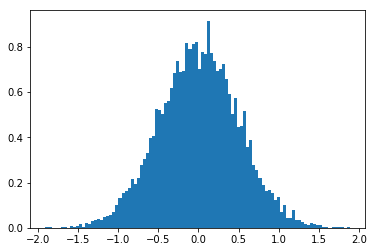

In [9]:
import matplotlib.pyplot as plt

# Plot z density

fig = plt.figure()
plt.hist(x=z, bins=100, density=True)
fig.show()

In [10]:
# Transformed distribution

x = log_normal_td.sample(sample_shape=(n,))
x.shape

TensorShape([10000])

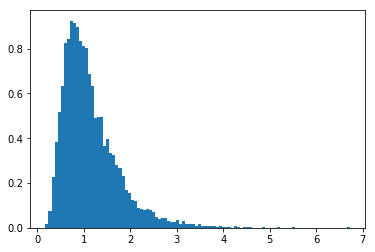

In [11]:
import matplotlib.pyplot as plt

# Plot x density

fig = plt.figure()
plt.hist(x=x, bins=100, density=True)
fig.show()

In [12]:
import tensorflow_probability as tfp

# Define log normal distribution

log_normal = tfp.distributions.LogNormal(loc=loc, scale=scale)
log_normal

<tfp.distributions.LogNormal 'LogNormal' batch_shape=[] event_shape=[] dtype=float32>

In [13]:
# Sample log_normal

l = log_normal.sample(sample_shape=(n,))
l.shape

TensorShape([10000])

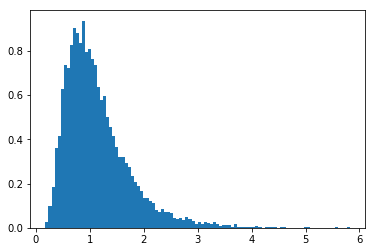

In [14]:
import matplotlib.pyplot as plt

# Plot l density

fig = plt.figure()
plt.hist(x=l, bins=100, density=True)
fig.show()

#### Log probability

In [15]:
# Log prob of LogNormal

log_prob = log_normal.log_prob(value=x)
log_prob.shape

TensorShape([10000])

In [16]:
# Log prob of log normal transformed distribution

log_prob_td = log_normal_td.log_prob(value=x)
log_prob_td.shape

TensorShape([10000])

In [17]:
import tensorflow as tf

# Check log probs

tf.norm(tensor=log_prob-log_prob_td)

<tf.Tensor: shape=(), dtype=float32, numpy=6.922083e-06>

### Event shape and batch shape

In [3]:
import tensorflow as tf
tf.random.set_seed(seed=42)

# Set a scaling lower triangular matrix

tril = tf.random.normal(shape=(2, 4, 4))
scale_low_tril = tf.linalg.LinearOperatorLowerTriangular(tril=tril)

In [4]:
# View of scale_low_tri

scale_low_tril.to_dense()

<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[ 0.3274685 ,  0.        ,  0.        ,  0.        ],
        [-2.3880599 , -1.0392479 ,  0.        ,  0.        ],
        [ 1.6994323 ,  0.28893656, -1.5066116 ,  0.        ],
        [-0.59722406, -1.9171132 , -0.62044144,  0.8504023 ]],

       [[-0.40604794,  0.        ,  0.        ,  0.        ],
        [-0.22561555, -0.7616443 ,  0.        ,  0.        ],
        [ 0.77852213, -0.47338897,  0.97772694,  0.        ],
        [ 0.20573747, -0.5256233 ,  0.32410017,  0.02545409]]],
      dtype=float32)>

In [5]:
import tensorflow_probability as tfp

# Define scale linear operator

scale_lin_op = tfp.bijectors.ScaleMatvecLinearOperator(
    scale=scale_low_tril)

In [6]:
import tensorflow_probability as tfp

# Define scale linear operator transformed distribution with a batch and event shape

mvn = tfp.distributions.TransformedDistribution(distribution=normal,
    bijector=scale_lin_op, batch_shape=[2], event_shape=[4])
mvn

<tfp.distributions.TransformedDistribution 'scale_matvec_linear_operatorNormal' batch_shape=[2] event_shape=[4] dtype=float32>

In [7]:
# Display event and batch shape

print('batch shape: ', mvn.batch_shape)
print('event shape: ', mvn.event_shape)

batch shape:  (2,)
event shape:  (4,)


In [8]:
# Sample

y1 = mvn.sample(sample_shape=(n,))
print(y1.shape)

(10000, 2, 4)


In [9]:
import tensorflow_probability as tfp

# Define a MultivariateNormalLinearOperator distribution

mvn2 = tfp.distributions.MultivariateNormalLinearOperator(loc=0,
    scale=scale_low_tril)
mvn2

<tfp.distributions.MultivariateNormalLinearOperator 'MultivariateNormalLinearOperator' batch_shape=[2] event_shape=[4] dtype=float32>

In [10]:
# Display event and batch shape

print('batch shape: ', mvn2.batch_shape)
print('event shape: ', mvn2.event_shape)

batch shape:  (2,)
event shape:  (4,)


In [11]:
# Sample

y2 = mvn2.sample(sample_shape=(n,))
print(y2.shape)

(10000, 2, 4)


In [12]:
import tensorflow as tf
tf.random.set_seed(seed=42)

# Check

xn = normal.sample(sample_shape=(n, 2, 4))
tf.norm(tensor=(mvn.log_prob(value=xn) - mvn2.log_prob(value=xn)))\
    / tf.norm(tensor=mvn.log_prob(value=xn))

<tf.Tensor: shape=(), dtype=float32, numpy=0.74997157>

***
<a id="coding_tutorial_3"></a>
## Subclassing bijectors

In [1]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

class MySigmoid(tfp.bijectors.Bijector):
    def __init__(self, validate_args=False, name='sigmoid'):
        super().__init__(validate_args=validate_args,
            forward_min_event_ndims=0, name=name)
        
    def _forward(self, x):
        return tf.math.sigmoid(x=x)
    
    def _inverse(self, y):
        return tf.math.log(x=y) - tf.math.log(x=1-y)
    
    def _inverse_log_det_jacobian(self, y):
        return -tf.math.log(x=y) - tf.math.log(1-y)
    
    def _forward_log_det_jacobian(self, x):
        return -self._inverse_log_det_jacobian(y=self._forward(x=x))
    
class MyShift(tfp.bijectors.Bijector):
    def __init__(self, shift, validate_args=False, name='shift'):
        super().__init__(validate_args=validate_args,
            forward_min_event_ndims=0, name=name,
            is_constant_jacobian=True)
        self.shift = shift
        
    def _forward(self, x):
        return x + self.shift
    
    def _inverse(self, y):
        return y - self.shift
    
    def _forward_log_det_jacobian(self, x):
        return tf.constant(0., x.dtype)

In [1]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# Define a new bijector: Cubic

class Cubic(tfp.bijectors.Bijector):

    def __init__(self, a, b, validate_args=False, name='Cubic'):
        self.a = tf.cast(x=a, dtype=tf.float32)
        self.b = tf.cast(x=b, dtype=tf.float32)
        if validate_args:
            assert tf.math.reduce_mean(input_tensor=tf.cast(
                x=tf.math.greater_equal(tf.math.abs(x=self.a), 1e-5), 
                dtype=tf.float32)) == 1.0
            assert tf.math.reduce_mean(input_tensor=tf.cast(
                x=tf.math.greater_equal(tf.math.abs(x=self.b), 1e-5),
                dtype=tf.float32)) == 1.0
        super().__init__(validate_args=validate_args,
            forward_min_event_ndims=0, name=name)

    def _forward(self, x):
        x = tf.cast(x=x, dtype=tf.float32)
        return tf.squeeze(input=tf.math.pow(
            x=self.a * x + self.b, y=3))
    
    def _inverse(self, y):
        y = tf.cast(x=y, dtype=tf.float32)
        return (tf.math.sign(x=y) * tf.math.pow(
            x=tf.math.abs(x=y), y=1/3) - self.b) / self.a
    
    def _forward_log_det_jacobian(self, x):
        x = tf.cast(x=x, dtype=tf.float32)
        return tf.math.log(3. * tf.math.abs(x=self.a))\
            + 2. * tf.math.log(tf.math.abs(self.a * x + self.b))

In [2]:
# Cubic bijector

cubic = Cubic(a=[1.0, -2.0], b=[-1.0, 0.4], validate_args=True)

In [3]:
import tensorflow as tf
tf.random.set_seed(seed=42)

# Apply forward transformation

x = tf.constant(value=[[1, 2], [3, 4]], dtype=tf.float32)
y = cubic.forward(x=x)
print(y)

tf.Tensor(
[[   0.        -46.655994]
 [   8.       -438.97598 ]], shape=(2, 2), dtype=float32)


In [4]:
import tensorflow as tf
tf.random.set_seed(seed=42)

# Check inverse
tf.norm(tensor=(x - cubic.inverse(y=y)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Function plots

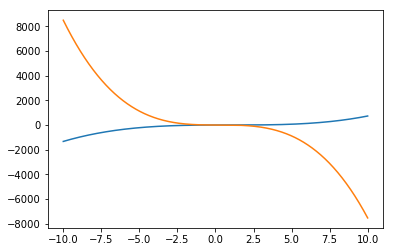

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the forward transformation

x = np.linspace(start=-10, stop=10, num=500).reshape(-1, 1)

plt.figure()
plt.plot(x, cubic.forward(x=x))
plt.show()

In [7]:
# Display shape

print(cubic.forward(x=x).shape)

(500, 2)


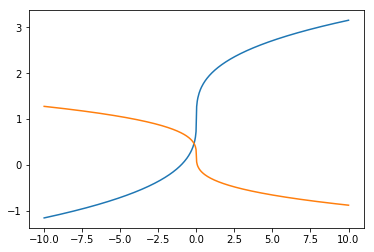

In [8]:
import matplotlib.pyplot as plt

# Plot the inverse

plt.figure()
plt.plot(x, cubic.inverse(y=x))
plt.show()

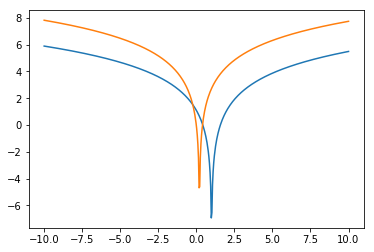

In [9]:
import matplotlib.pyplot as plt

# Plot the forward log Jacobian determinant

plt.figure()
plt.plot(x, cubic.forward_log_det_jacobian(x, event_ndims=0))
plt.show()

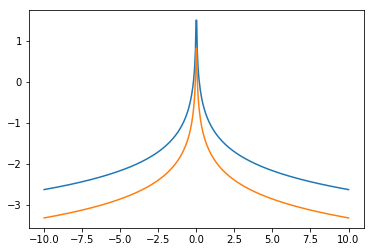

In [10]:
import matplotlib.pyplot as plt

# Plot the inverse log Jacobian determinant

plt.figure()
plt.plot(x, cubic.inverse_log_det_jacobian(y=x, event_ndims=0))
plt.show()

#### TransformedDistribution and plots

In [11]:
import tensorflow_probability as tfp

# Create a transformed distribution with Cubic

normal = tfp.distributions.Normal(loc=0., scale=1.,)
cubed_normal = tfp.distributions.TransformedDistribution(
    distribution=normal, bijector=cubic, event_shape=[2]
)
cubed_normal

<tfp.distributions.TransformedDistribution 'CubicNormal' batch_shape=[] event_shape=[2] dtype=float32>

In [12]:
# Sample cubed_normal

n = 1000
g = cubed_normal.sample(sample_shape=(n,))
g.shape

TensorShape([1000, 2])

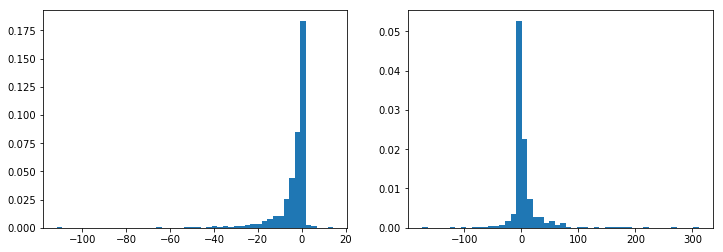

In [13]:
import matplotlib.pyplot as plt

# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(x=g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(x=g[..., 1], bins=50, density=True)
plt.show()

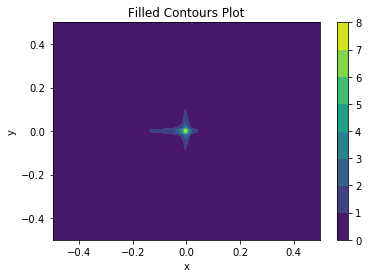

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Make contour plot

xx = np.linspace(start=-0.5, stop=0.5, num=100)
yy = np.linspace(start=-0.5, stop=0.5, num=100)
X, Y = np.meshgrid(xx, yy)

fig, ax = plt.subplots(nrows=1, ncols=1)
Z = cubed_normal.prob(value=np.dstack(tup=(X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title(label='Filled Contours Plot')
ax.set_xlabel(xlabel='x')
ax.set_ylabel(ylabel='y')
fig.show()

In [15]:
import tensorflow_probability as tfp

# Create a transformed distribution with the inverse of Cube

inverse_cubic = tfp.bijectors.Invert(bijector=cubic)
inv_cubed_normal = tfp.distributions.TransformedDistribution(
    distribution=normal, bijector=inverse_cubic, event_shape=[2]
)
inv_cubed_normal

<tfp.distributions.TransformedDistribution 'invert_CubicNormal' batch_shape=[] event_shape=[2] dtype=float32>

In [16]:
# Samble inv_cubed_normal

n = 1000
g = inv_cubed_normal.sample(sample_shape=(n,))
g.shape

TensorShape([1000, 2])

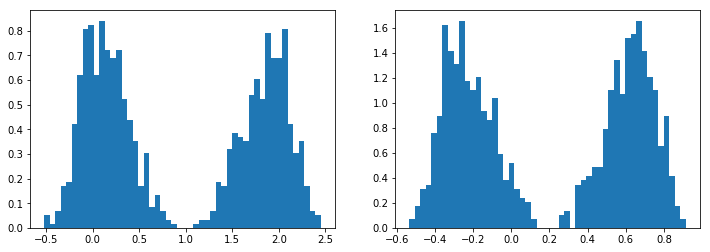

In [17]:
import matplotlib.pyplot as plt

# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(x=g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(x=g[..., 1], bins=50, density=True)
plt.show()

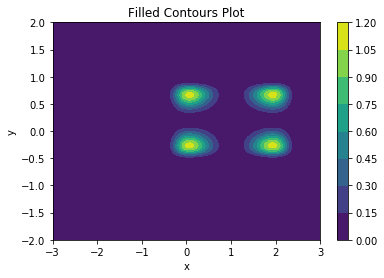

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Make contour plot

xx = np.linspace(start=-3.0, stop=3.0, num=100)
yy = np.linspace(start=-2.0, stop=2.0, num=100)
X, Y = np.meshgrid(xx, yy)

fig, ax = plt.subplots(nrows=1, ncols=1)
Z = inv_cubed_normal.prob(value=np.dstack(tup=(X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title(label='Filled Contours Plot')
ax.set_xlabel(xlabel='x')
ax.set_ylabel(ylabel='y')
fig.show()

#### Training the bijector

In [19]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# Create a mixture of four Gaussians

probs = [0.45, 0.55]
mix_gauss = tfp.distributions.Mixture(
    cat=tfp.distributions.Categorical(probs=probs),
    components=[
        tfp.distributions.Normal(loc=2.3, scale=0.4),
        tfp.distributions.Normal(loc=-0.8, scale=0.4)
    ]
)
mix_gauss

<tfp.distributions.Mixture 'Mixture' batch_shape=[] event_shape=[] dtype=float32>

In [20]:
import tensorflow as tf

# Create the dataset

x_train = mix_gauss.sample(sample_shape=10000)
x_train = tf.data.Dataset.from_tensor_slices(tensors=x_train)
x_train = x_train.batch(batch_size=128)

x_valid = mix_gauss.sample(sample_shape=1000)
x_valid = tf.data.Dataset.from_tensor_slices(tensors=x_valid)
x_valid = x_valid.batch(batch_size=128)

print(x_train.element_spec)
print(x_valid.element_spec)

TensorSpec(shape=(None,), dtype=tf.float32, name=None)
TensorSpec(shape=(None,), dtype=tf.float32, name=None)


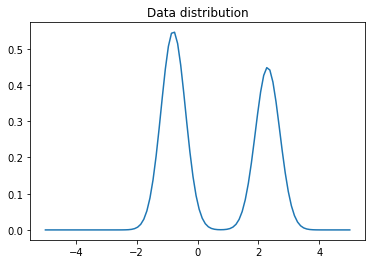

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data distribution

x = np.linspace(start=-5.0, stop=5.0, num=100)
plt.figure()
plt.plot(x, mix_gauss.prob(value=x))
plt.title(label='Data distribution')
plt.show()

In [22]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# Make a trainable bijector

trainable_inv_cubic = tfp.bijectors.Invert(bijector=Cubic(
    a=tf.Variable(initial_value=0.25),
    b=tf.Variable(initial_value=-0.1)))
trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.25>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.1>)

In [23]:
import tensorflow_probability as tfp

# Make a trainable transformed distribution

trainable_dist = tfp.distributions.TransformedDistribution(
    distribution=normal, bijector=trainable_inv_cubic
)
trainable_dist

<tfp.distributions.TransformedDistribution 'invert_CubicNormal' batch_shape=[] event_shape=[] dtype=float32>

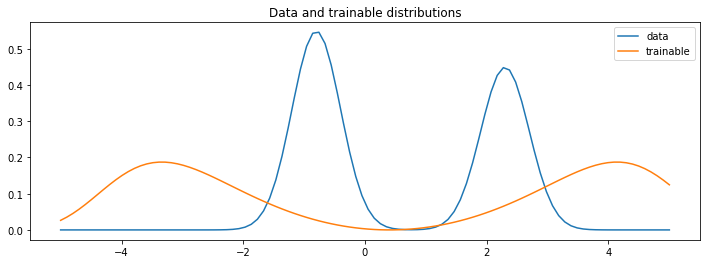

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data and learned distributions

x = np.linspace(start=-5.0, stop=5.0, num=100)

plt.figure(figsize=(12, 4))
plt.plot(x, mix_gauss.prob(value=x), label='data')
plt.plot(x, trainable_dist.prob(value=x), label='trainable')
plt.title(label='Data and trainable distributions')
plt.legend()
plt.show()

In [25]:
import tensorflow as tf
tf.random.set_seed(seed=42)

# Train the bijector

num_epochs = 10
opt = tf.keras.optimizers.Adam()
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    train_loss = tf.keras.metrics.Mean()
    val_loss = tf.keras.metrics.Mean()
    for train_batch in x_train:
        with tf.GradientTape() as tape:
            tape.watch(trainable_inv_cubic.trainable_variables)
            loss = -trainable_dist.log_prob(value=train_batch)
        train_loss(loss)
        grads = tape.gradient(target=loss,
            sources=trainable_inv_cubic.trainable_variables)
        opt.apply_gradients(grads_and_vars=zip(
            grads, trainable_inv_cubic.trainable_variables))
    train_losses.append(train_loss.result().numpy())
        
    # Validation
    for valid_batch in x_valid:
        loss = -trainable_dist.log_prob(valid_batch)
        val_loss(loss)
    valid_losses.append(val_loss.result().numpy())
    
    print("Epoch {}, Loss: train={}, valid={}".format(
        epoch, train_loss.result(), val_loss.result()))

Epoch 0, Loss: train=2.8696703910827637, valid=2.4837427139282227
Epoch 1, Loss: train=2.2001571655273438, valid=1.9528859853744507
Epoch 2, Loss: train=1.763717770576477, valid=1.609009027481079
Epoch 3, Loss: train=1.4880692958831787, valid=1.4040839672088623
Epoch 4, Loss: train=1.3343921899795532, valid=1.3002811670303345
Epoch 5, Loss: train=1.2640005350112915, valid=1.2578423023223877
Epoch 6, Loss: train=1.2386945486068726, valid=1.244080662727356
Epoch 7, Loss: train=1.231675386428833, valid=1.2403817176818848
Epoch 8, Loss: train=1.2301331758499146, valid=1.2394617795944214
Epoch 9, Loss: train=1.2298473119735718, valid=1.2392210960388184


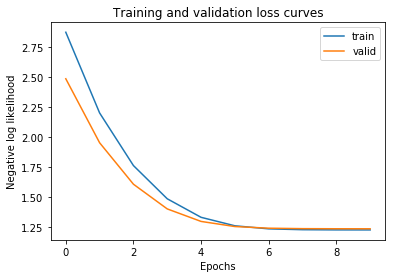

In [26]:
import matplotlib.pyplot as plt

# Plot the learning curves

plt.figure()
plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel(xlabel='Epochs')
plt.ylabel(ylabel='Negative log likelihood')
plt.title(label='Training and validation loss curves')
plt.show()

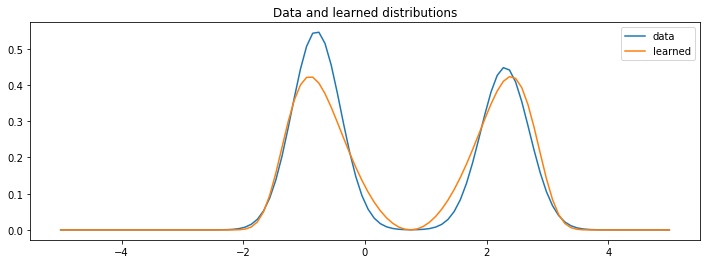

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data and learned distributions

x = np.linspace(start=-5.0, stop=5.0, num=100)

plt.figure(figsize=(12, 4))
plt.plot(x, mix_gauss.prob(value=x), label='data')
plt.plot(x, trainable_dist.prob(value=x), label='learned')
plt.title(label='Data and learned distributions')
plt.legend()
plt.show()

In [28]:
# Display trainable variables

trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.565452>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.42197803>)

***
<a id="coding_tutorial_4"></a>
## Normalising flows

In [1]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# z ~ N(0, I)
# x[i] = z[i] * scale(x[0:i-1]) + loc(x[0:i-1]), i=0,...,D-1

made = tfp.bijectors.AutoregressiveNetwork(params=2, event_shape=[3],
    hidden_units=[16, 16], activation=tf.keras.activations.sigmoid)

print('Output made shape:', made(tf.random.normal(
    shape=(2, 3))).shape)

maf_bijector = tfp.bijectors.MaskedAutoregressiveFlow(
    shift_and_log_scale_fn=made)

def forward(z):
    x = tf.zeros_like(z)
    for _ in range(D):
        shift, log_scale = shift_and_log_scale_fn(x)
        x = z * tf.math.exp(x=log_scale) + shift
    return x

def inverse(x):
    shift, log_scale = shift_and_log_scale_fn(x)
    return (x - shift) / tf.math.exp(x=log_scale)

normal = tfp.distributions.Normal(loc=0., scale=1.)
maf = tfp.distributions.TransformedDistribution(
    distribution=normal, bijector=maf_bijector, event_shape=[3])
print('maf:', maf)

Output made shape: (2, 3, 2)
maf: tfp.distributions.TransformedDistribution("masked_autoregressive_flowNormal", batch_shape=[], event_shape=[3], dtype=float32)


In [2]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# z ~ N(0, I)
# x[i] = z[i] + loc(x[0:i-1]), i=0,...,D-1

made = tfp.bijectors.AutoregressiveNetwork(params=2, event_shape=[3],
    hidden_units=[16, 16], activation=tf.keras.activations.sigmoid)

maf_bijector = tfp.bijectors.MaskedAutoregressiveFlow(
    shift_and_log_scale_fn=lambda y: (made(y)[..., 0], None),
    is_constant_jacobian=True
)
maf_bijector._made = made

normal = tfp.distributions.Normal(loc=0., scale=1.)
maf = tfp.distributions.TransformedDistribution(
    distribution=normal, bijector=maf_bijector, event_shape=[3])
maf

<tfp.distributions.TransformedDistribution 'masked_autoregressive_flowNormal' batch_shape=[] event_shape=[3] dtype=float32>

In [3]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# z ~ N(0, I)
# z[i] = (x[i] - loc(x[0:i-1])) / scale(x[0:i-1]), i=0,...,D-1

made = tfp.bijectors.AutoregressiveNetwork(params=2, event_shape=[3],
    hidden_units=(16, 16), activation=tf.keras.activations.sigmoid)

iaf_bijector = tfp.bijectors.Invert(bijector=
    tfp.bijectors.MaskedAutoregressiveFlow(
        shift_and_log_scale_fn=made))

normal = tfp.distributions.Normal(loc=0., scale=1.)
iaf = tfp.distributions.TransformedDistribution(
    distribution=normal, bijector=iaf_bijector, event_shape=[3])
iaf

<tfp.distributions.TransformedDistribution 'invert_masked_autoregressive_flowNormal' batch_shape=[] event_shape=[3] dtype=float32>

In [2]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

# z ~ N(0, I)
# x[0:d] = z[0:d]
# x[d:D] = z[d:D]*scale(z[0:d]) + loc(z[0:d])

shift_and_log_scale_fn = tfp.bijectors.real_nvp_default_template(
    hidden_layers=(32, 32), activation=tf.nn.relu)
print(shift_and_log_scale_fn(tf.random.normal(shape=(2,)), 1))

shift_and_log_scale_fn = tfp.bijectors.real_nvp_default_template(
    hidden_layers=(32, 32), activation=tf.nn.relu, shift_only=True)
print('\n')
print(shift_and_log_scale_fn(tf.random.normal(shape=(2,)), 1))

shift_and_log_scale_fn = tfp.bijectors.real_nvp_default_template(
    hidden_layers=(32, 32), activation=tf.nn.relu)

realnvp_bijector = tfp.bijectors.RealNVP(num_masked=2,
    shift_and_log_scale_fn=shift_and_log_scale_fn)

realnvp_bijector = tfp.bijectors.RealNVP(fraction_masked=0.5,
    shift_and_log_scale_fn=shift_and_log_scale_fn)

def forward(z):
    x = tf.zeros_like(z)
    x[0:d] = z[0:d]
    shift, log_scale = shift_and_log_scale_fn(z[0:d])
    x[d:D] = z[d:D]*tf.math.exp(x=log_scale) + shift
    return x

def inverse(x):
    z = tf.zeros_like(x)
    z[0:d] = x[0:d]
    shift, log_scale = shift_and_log_scale_fn(x[0:d])
    z[d:D] = (x[d:D] - shift) * tf.math.exp(-log_scale)
    return z

mvn = tfp.distributions.MultivariateNormalDiag(loc=[0., 0., 0.])
realnvp = tfp.distributions.TransformedDistribution(
    distribution=mvn, bijector=realnvp_bijector)
realnvp

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.22713283], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.05992416], dtype=float32)>)


(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.03299494], dtype=float32)>, None)


<tfp.distributions.TransformedDistribution 'real_nvpMultivariateNormalDiag' batch_shape=[] event_shape=[3] dtype=float32>

In [1]:
import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

permute = tfp.bijectors.Permute(permutation=[1, 2, 0])

realnvp1 = tfp.bijectors.RealNVP(fraction_masked=0.5,
    shift_and_log_scale_fn=tfp.bijectors.real_nvp_default_template(
        hidden_layers=[32, 32]))
realnvp2 = tfp.bijectors.RealNVP(fraction_masked=0.5,
    shift_and_log_scale_fn=tfp.bijectors.real_nvp_default_template(
        hidden_layers=[32, 32]))
realnvp3 = tfp.bijectors.RealNVP(fraction_masked=0.5,
    shift_and_log_scale_fn=tfp.bijectors.real_nvp_default_template(
        hidden_layers=[32, 32]))

chained_bijector = tfp.bijectors.Chain(bijectors=[
    realnvp3, permute, realnvp2, permute, realnvp1])

mvn = tfp.distributions.MultivariateNormalDiag(loc=[0., 0., 0.])
realnvp = tfp.distributions.TransformedDistribution(
    distribution=mvn, bijector=chained_bijector)
realnvp

<tfp.distributions.TransformedDistribution 'chain_of_real_nvp_of_permute_of_real_nvp_of_permute_of_real_nvpMultivariateNormalDiag' batch_shape=[] event_shape=[3] dtype=float32>

In [1]:
# Load dataset

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

n_samples = 1000
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
X_data = StandardScaler().fit_transform(X=X)
xlim, ylim = [-2, 2], [-2, 2]

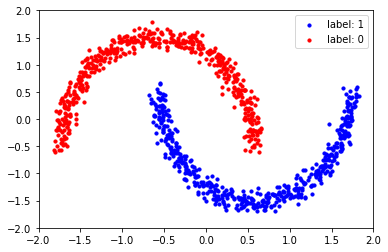

In [4]:
# Plot with labels

import numpy as np
import matplotlib.pyplot as plt

y_label = y.astype(np.bool)
X_train, Y_train = X_data[..., 0], X_data[..., 1]
plt.figure()
plt.scatter(x=X_train[y_label], y=Y_train[y_label],
    s=10, color='blue')
plt.scatter(x=X_train[y_label==False], y=Y_train[y_label==False],
    s=10, color='red')
plt.legend(['label: 1', 'label: 0'])
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

In [5]:
# Define base distribution

import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

base_distribution = tfp.distributions.Normal(loc=0., scale=1.)

In [6]:
# Define the trainable distribution

import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

def make_masked_autoregressive_flow(hidden_units=[16, 16],
    activation=tf.keras.activations.relu):
    made = tfp.bijectors.AutoregressiveNetwork(params=2,
        event_shape=[2], hidden_units=hidden_units,
        activation=activation)
    return tfp.bijectors.MaskedAutoregressiveFlow(
        shift_and_log_scale_fn=made)

trainable_distribution = tfp.distributions.TransformedDistribution(
    distribution=base_distribution,
    bijector=make_masked_autoregressive_flow(),
    event_shape=[2]
)

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [8]:
# Define a plot contour routine

import numpy as np
import matplotlib.pyplot as plt

def plot_contour_prob(dist, rows=1, title=[''], scale_fig=4):
    cols = int(len(dist) / rows)
    xx = np.linspace(start=-5.0, stop=5.0, num=100)
    yy = np.linspace(start=-5.0, stop=5.0, num=100)
    X, Y = np.meshgrid(xx, yy)

    fig, ax = plt.subplots(nrows=rows, ncols=cols,
        figsize=(scale_fig * cols, scale_fig * rows))
    fig.tight_layout(pad=4.5)

    i = 0
    for r in range(rows):
        for c in range(cols):
            Z = dist[i].prob(value=np.dstack(tup=(X, Y)))
            if len(dist) == 1:
                axi = ax
            elif rows == 1:
                axi = ax[c]
            else:
                axi = ax[r, c]

            # Plot contour
            p = axi.contourf(X, Y, Z)

            # Add a colorbar
            divider = make_axes_locatable(axes=axi)
            cax = divider.append_axes(
                position="right", size="5%", pad=0.1)
            cbar = fig.colorbar(mappable=p, cax=cax)

            # Set title and labels
            axi.set_title(label='Filled Contours Plot: '
                + str(title[i]))
            axi.set_xlabel(xlabel='x')
            axi.set_ylabel(ylabel='y')

            i += 1
    plt.show()

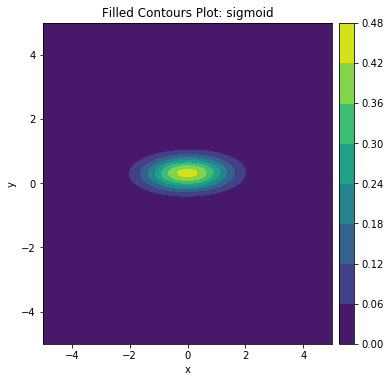

In [9]:
# Plot contour

import tensorflow_probability as tfp

maf = tfp.distributions.TransformedDistribution(
    distribution=base_distribution,
    bijector=make_masked_autoregressive_flow(
        activation=tf.keras.activations.sigmoid),
    event_shape=[2]
)
plot_contour_prob(dist=[maf], scale_fig=6, title=['sigmoid'])

In [10]:
# Make samples

x = base_distribution.sample(sample_shape=(1000, 2))
names = [base_distribution.name, trainable_distribution.bijector.name]
samples= [x, trainable_distribution.bijector.forward(x=x)]

In [11]:
# Define a scatter plot routine for the bijectors

import matplotlib.pyplot as plt

def _plot(results, names, rows=1, legend=False):
    cols = int(len(results) / rows)
    f, arr = plt.subplots(nrows=rows, ncols=cols,
        figsize=(4 * cols, 4 * rows))
    i = 0
    for r in range(rows):
        for c in range(cols):
            res = results[i]
            X, Y = res[..., 0].numpy(), res[..., 1].numpy()
            if rows == 1:
                p = arr[c]
            else:
                p = arr[r, c]
            p.scatter(x=X, y=Y, s=10, color='red')
            p.set_xlim([-5, 5])
            p.set_ylim([-5, 5])
            p.set_title(label=names[i])
            
            i += 1

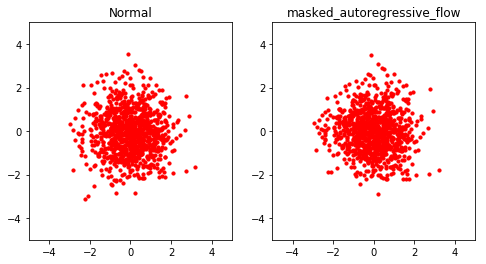

In [12]:
# Plot

_plot(results=samples, names=names)

#### Training a MaskedAutoregressiveFlow bijector

In [13]:
# Define a training routine

import tensorflow as tf
tf.random.set_seed(seed=42)

def train_dist_routine(trainable_distribution, n_epochs=200,
    batch_size=None, n_disp=100):
    x_ = tf.keras.Input(shape=(2,), dtype=tf.float32)
    log_prob_ = trainable_distribution.log_prob(value=x_)
    model = tf.keras.Model(inputs=x_, outputs=log_prob_)

    model.compile(
        loss=lambda _, log_prob: -log_prob,
        optimizer=tf.optimizers.Adam(),
    )

    ns = X_data.shape[0]
    if batch_size is None:
        batch_size = ns

    # Display the loss every n_disp epoch
    epoch_callback = tf.keras.callbacks.LambdaCallback(
        on_epoch_end=lambda epoch, logs: print(
            '\n Epoch {}/{}'.format(epoch+1, n_epochs, logs),
            '\n\t ' + (': {:.4f}, '.join(logs.keys())
            + ': {:.4f}').format(*logs.values())
        ) if epoch % n_disp == 0 else False 
    )

    history = model.fit(
        x=X_data, y=np.zeros((ns, 0), dtype=np.float32),
        batch_size=batch_size, epochs=n_epochs,
        validation_split=0.2, shuffle=True,
        verbose=False, callbacks=[epoch_callback]
    )
    return history

In [14]:
# Train the distribution

history = train_dist_routine(n_epochs=600, n_disp=50,
    trainable_distribution=trainable_distribution)


 Epoch 1/600 
	 loss: 2.8386, val_loss: 2.7797

 Epoch 51/600 
	 loss: 2.7443, val_loss: 2.7021

 Epoch 101/600 
	 loss: 2.6889, val_loss: 2.6402

 Epoch 151/600 
	 loss: 2.6540, val_loss: 2.5906

 Epoch 201/600 
	 loss: 2.6313, val_loss: 2.5714

 Epoch 251/600 
	 loss: 2.6023, val_loss: 2.5474

 Epoch 301/600 
	 loss: 2.5490, val_loss: 2.5033

 Epoch 351/600 
	 loss: 2.4497, val_loss: 2.4209

 Epoch 401/600 
	 loss: 2.2789, val_loss: 2.2824

 Epoch 451/600 
	 loss: 2.1426, val_loss: 2.1646

 Epoch 501/600 
	 loss: 2.0648, val_loss: 2.1210

 Epoch 551/600 
	 loss: 2.0195, val_loss: 2.0906


In [15]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

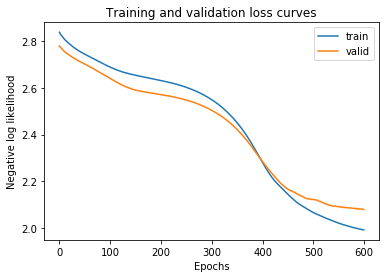

In [16]:
# Plot loss vs epoch

import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel(xlabel='Epochs')
plt.ylabel(ylabel='Negative log likelihood')
plt.title(label='Training and validation loss curves')
plt.show()

In [17]:
# Make samples

x = base_distribution.sample(sample_shape=(1000, 2))
names = [base_distribution.name, trainable_distribution.bijector.name]
samples = [x, trainable_distribution.bijector.forward(x=x)]

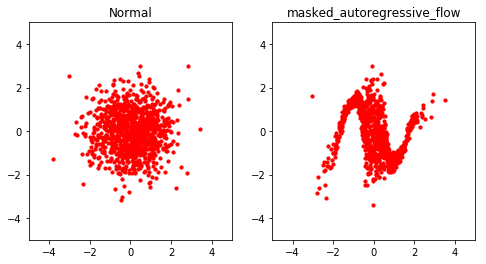

In [18]:
# Plot

_plot(results=samples, names=names)

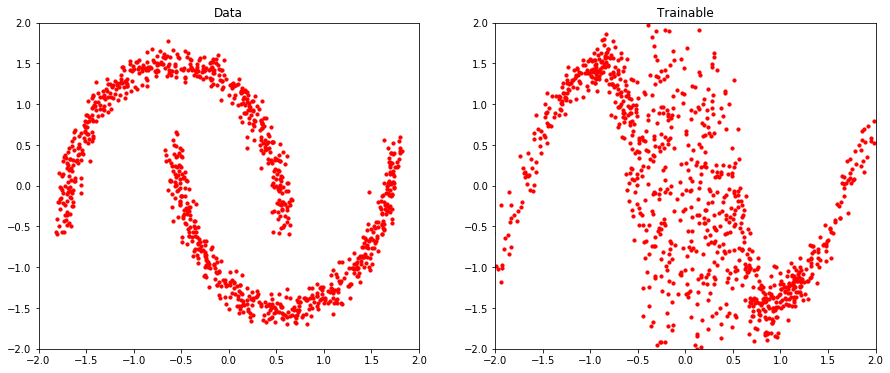

In [19]:
# Define a plot routine

import matplotlib.pyplot as plt

def visualize_training_data(samples):
    f, arr = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    names = ['Data', 'Trainable']
    samples = [tf.constant(X_data), samples[-1]]

    for i in range(2):
        res = samples[i]
        X, Y = res[..., 0].numpy(), res[..., 1].numpy()
        arr[i].scatter(x=X, y=Y, s=10, color='red')
        arr[i].set_xlim([-2, 2])
        arr[i].set_ylim([-2, 2])
        arr[i].set_title(label=names[i])

visualize_training_data(samples=samples)

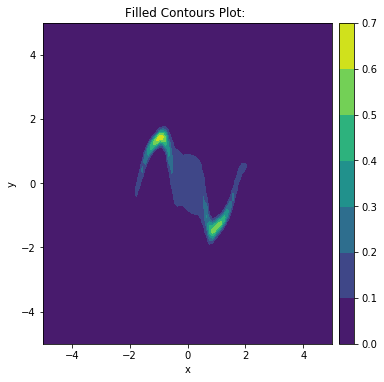

In [20]:
# Plot contour

plot_contour_prob(dist=[trainable_distribution], scale_fig=6)

#### Training a chain of MaskedAutoregressiveFlow bijectors

In [21]:
# Define a more expressive model

import tensorflow as tf
tf.random.set_seed(seed=42)
import tensorflow_probability as tfp

num_bijectors = 6
bijectors = []

for i in range(num_bijectors):
    masked_auto_i = make_masked_autoregressive_flow(
        hidden_units=[256, 256], activation=tf.keras.activations.relu)
    bijectors.append(masked_auto_i)
    bijectors.append(tfp.bijectors.Permute(permutation=[1, 0]))
    
flow_bijector = tfp.bijectors.Chain(bijectors=list(reversed(
    bijectors[:-1])))

In [22]:
# Define the trainable distribution

import tensorflow_probability as tfp

trainable_distribution = tfp.distributions.TransformedDistribution(
    distribution=base_distribution, bijector=flow_bijector,
    event_shape=[2])

In [23]:
# Make samples

def make_samples():
    x = base_distribution.sample(sample_shape=(1000, 2))
    samples = [x]
    names = [base_distribution.name]
    for bijector in reversed(
        trainable_distribution.bijector.bijectors):
        x = bijector.forward(x=x)
        samples.append(x)
        names.append(bijector.name)
    return names, samples

names, samples = make_samples()

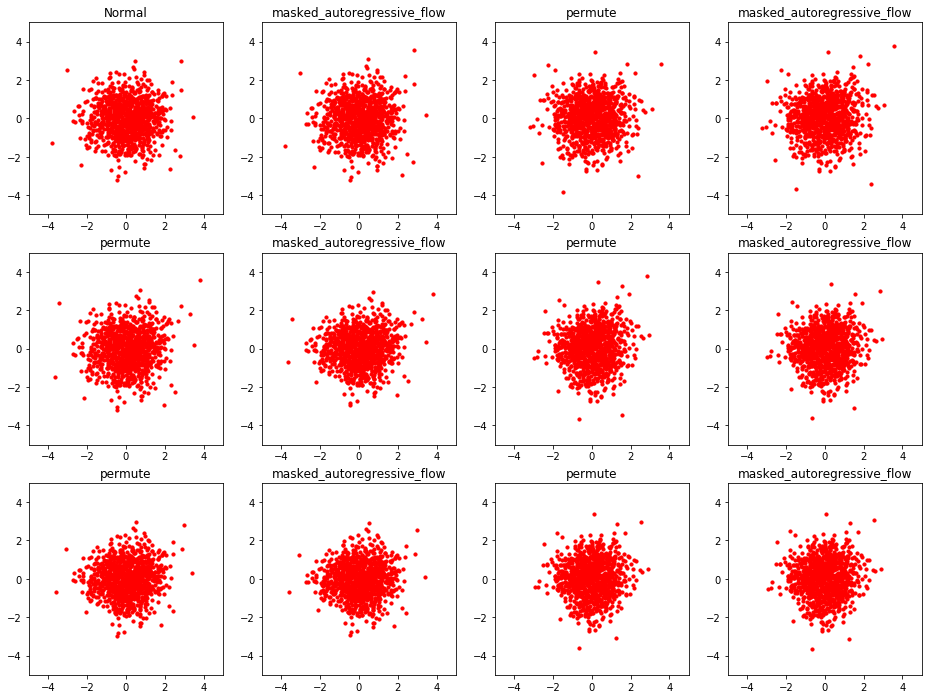

In [24]:
# Plot

_plot(results=samples, names=names, rows=3)

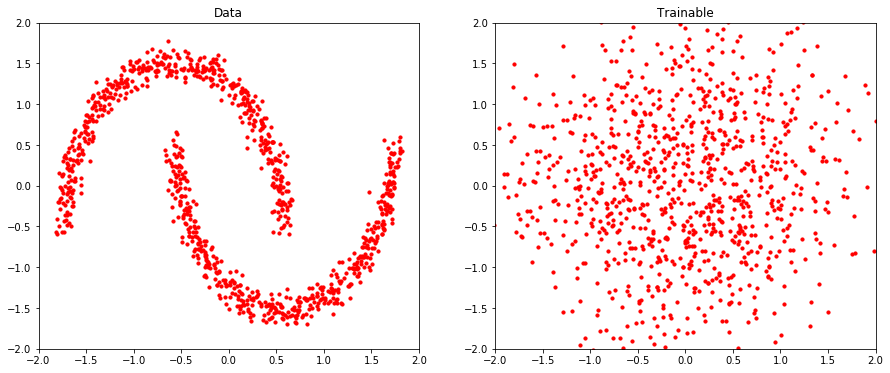

In [25]:
# Plot

visualize_training_data(samples=samples)

In [26]:
# Train the distribution

history = train_dist_routine(n_epochs=600, n_disp=50,
    trainable_distribution=trainable_distribution)


 Epoch 1/600 
	 loss: 2.8617, val_loss: 2.6202

 Epoch 51/600 
	 loss: 2.4323, val_loss: 2.4289

 Epoch 101/600 
	 loss: 2.0433, val_loss: 2.0553

 Epoch 151/600 
	 loss: 1.8321, val_loss: 2.0050

 Epoch 201/600 
	 loss: 2.6536, val_loss: 2.6499

 Epoch 251/600 
	 loss: 1.7689, val_loss: 1.8971

 Epoch 301/600 
	 loss: 2.3917, val_loss: 2.3683

 Epoch 351/600 
	 loss: 2.1792, val_loss: 2.0397

 Epoch 401/600 
	 loss: 1.7991, val_loss: 2.0530

 Epoch 451/600 
	 loss: 3.9402, val_loss: 3.8364

 Epoch 501/600 
	 loss: 2.3558, val_loss: 2.2830

 Epoch 551/600 
	 loss: 1.8492, val_loss: 1.8647


In [27]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

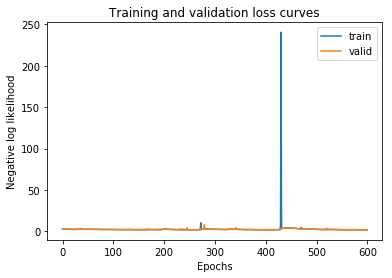

In [28]:
# Plot loss vs epoch

import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel(xlabel='Epochs')
plt.ylabel(ylabel='Negative log likelihood')
plt.title(label='Training and validation loss curves')
plt.show()

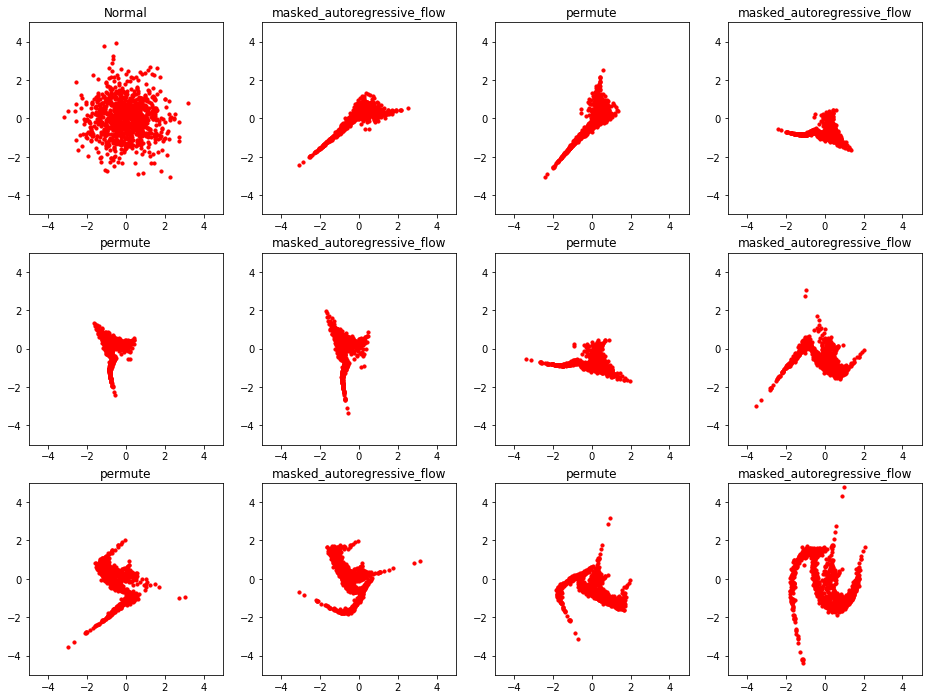

In [29]:
# Make samples and plot

names, samples = make_samples()
_plot(results=samples, names=names, rows=3)

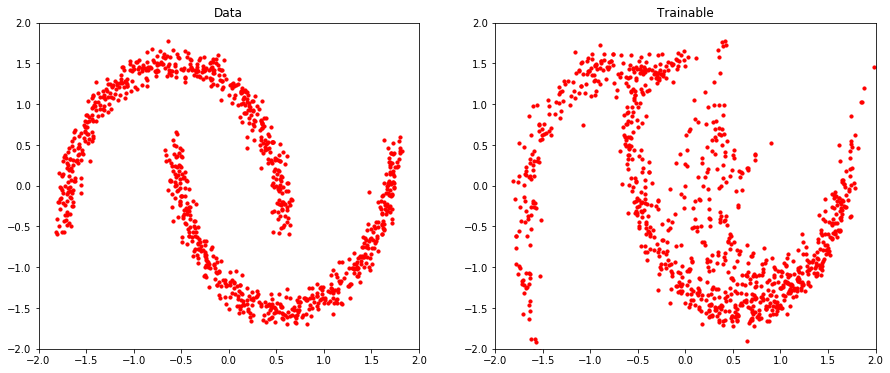

In [30]:
# Plot

visualize_training_data(samples=samples)

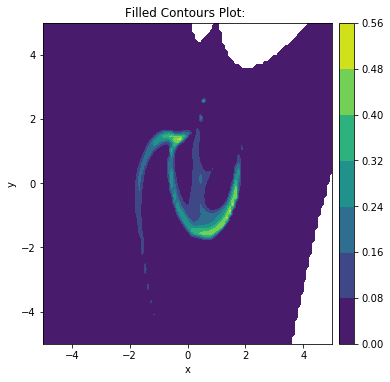

In [31]:
# Plot

plot_contour_prob(dist=[trainable_distribution], scale_fig=6)